In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
data = pd.read_fwf("/content/housing.csv",width=[1,2,3])
data[:10]

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
6,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
7,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
8,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
9,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0


In [3]:
col_names_list = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'PRICE']

for index,col in enumerate(data.columns):
  temp = data[col]
  data = data.drop(col,axis=1)
  data[col_names_list[index]] = temp

data[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
6,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
7,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
8,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
9,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0


In [4]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [5]:
data.nunique()

CRIM       503
ZN          25
INDUS       75
CHAS         2
NOX         81
RM         445
AGE        356
DIS        411
RAD          8
TAX         66
PTRATIO     46
B          357
LSTAT      454
PRICE      229
dtype: int64

In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,1.719676,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.695449,4.338614,408.459406,18.461782,356.594376,12.668257,22.529901
std,2.655047,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.001595,1.410770,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.072000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.251990,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.102500,4.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,2.330990,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.116700,5.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [16]:
X[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
6,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
7,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
8,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10
9,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45


In [9]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
],name="model1")

model.compile(loss="mae",
              optimizer="adam",
              metrics=["mae","mse"])
model.fit(X_train,y_train,
          epochs=100,
          verbose=0)

In [40]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 4.3387 - mae: 4.3387 - mse: 37.4391


[4.338676929473877, 4.338676929473877, 37.43907928466797]

In [42]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
y_pred = reg.predict(X_test)

In [46]:
from sklearn import metrics
acc_rf = metrics.r2_score(y_test, y_pred)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.171513157894736
MSE: 10.318634105263152
RMSE: 3.2122630815770914


In [47]:
X[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21


In [48]:
y[:5]

0    21.6
1    34.7
2    33.4
3    36.2
4    28.7
Name: PRICE, dtype: float64

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_normalize = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

# fit and transform the data
X[cols_to_normalize] = scaler.fit_transform(X[cols_to_normalize])
X[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.001833,0.0,0.242302,0.0,0.172840,0.547998,0.782698,0.507271,0.142857,0.104962,0.553191,1.000000,0.204470
1,0.001831,0.0,0.242302,0.0,0.172840,0.694386,0.599382,0.507271,0.142857,0.104962,0.553191,0.989737,0.063466
2,0.002341,0.0,0.063050,0.0,0.150206,0.658555,0.441813,0.634060,0.285714,0.066794,0.648936,0.994276,0.033389
3,0.006025,0.0,0.063050,0.0,0.150206,0.687105,0.528321,0.634060,0.285714,0.066794,0.648936,1.000000,0.099338
4,0.002088,0.0,0.063050,0.0,0.150206,0.549722,0.574665,0.634060,0.285714,0.066794,0.648936,0.992990,0.096026


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
],name="model1")

model.compile(loss="mae",
              optimizer="adam",
              metrics=["mae","mse"])
model.fit(X_train,y_train,
          epochs=100,
          verbose=0)

In [52]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 3.4772 - mae: 3.4772 - mse: 22.8755


[3.4772262573242188, 3.4772262573242188, 22.8754825592041]

In [56]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


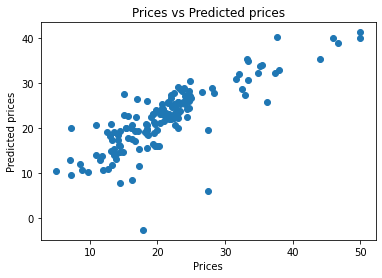

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()